import significa “traer una herramienta externa al programa”.
numpy (abreviado como np) es una librería (un conjunto de herramientas) que permite trabajar con matemática avanzada, especialmente arreglos y matrices.

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
from sklearn.neighbors import LocalOutlierFactor

“sklearn” (scikit-learn) es una librería de inteligencia artificial y machine learning.
Dentro de ella está el módulo “neighbors”.
Dentro de “neighbors” está la clase LocalOutlierFactor, que es un algoritmo que sirve para detectar puntos raros, también llamados outliers.
¿Qué es un outlier?
Un dato que “se sale del grupo”, que está lejos de los demás. Por ejemplo, si todos pesan 70–80 kilos y alguien pesa 200, es un outlier.

In [10]:
np.random.seed(42)

Configura el generador de números aleatorios para que siempre produzca los mismos valores.
Porque si tu programa genera puntos al azar, no podrás repetir exactamente los mismos resultados cada vez que lo ejecutes.
Con seed(42) aseguramos:
siempre salen los mismos datos aleatorios

el ejemplo es reproducible

el gráfico no cambia cada vez

In [11]:
#GENERAMOS LOS DATOS DE ENTRENAMIENTO

El símbolo # inicia un comentario, es decir: una nota para el humano, no para la computadora.
Aquí el comentario # Generamos los datos de entrenamiento No se ejecuta. Solo explica qué se hará en las siguientes líneas de codigo

In [12]:
X_inliers = 0.3 * np.random.randn(100, 2)

np.random.randn(100,2) Es un generador de números aleatorios que siguen una distribución normal (también llamada campana de Gauss).
genera 100 filas
cada una de las filas con 2 números
los números siguen una distribución normal con media 0 y desviación estándar 1
¿Por qué hacemos 0.3 * ...? Porque queremos que los puntos estén más juntos y centrados.
Multiplicar los valores aleatorios por 0.3:
reduce su tamaño

hace que el grupo de puntos sea más compacto

evita que se dispersen demasiado en el gráfico
Antes una fila: [-1.2 0.7] Después de multiplicar x 0.3: [-0.36 0.21]. Mucho más cerca del origen.
¿Qué significa X_inliers = ...? Estamos guardando los resultados en una variable llamada X_inliers.
El nombre viene de:
inlier → punto normal, punto dentro del grupo

lo contrario de outlier, que es un punto raro o externo
X_inliers es un grupo de 100 puntos normales, cada uno con 2 coordenadas (x, y).
Estos serán los datos “buenos” o “normales” del dataset.

In [13]:
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]


Qué es X_inliers + 2?
A cada punto del arreglo, súmale 2 a las dos coordenadas:
Si un punto era: [-0.36, 0.21]. Entonces [-0.36 + 2, 0.21 + 2] = [1.64, 2.21]
PREGUNTA AL CURSO: ¿Qué es X_inliers - 2?
RESPUESTA: ¿Qué es X_inliers - 2? [-0.36, 0.21] → [-2.36, -1.79]
¿Qué hace np.r_[ ... , ... ]?
Es una función que une dos conjuntos de datos verticalmente.
Así: [ grupo desplazado +2 ] [ grupo desplazado -2 ] Resultado: una sola matriz con 200 filas.
¿Por qué hacemos esto?
Generamos dos grupos de puntos “buenos”:
uno centrado alrededor de (2,2)
otro centrado alrededor de (-2,-2)
Estos dos grupos representarán datos normales.

In [14]:
#GENERAMOS ALGUNOS OUTLIERS
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

¿Qué es np.random.uniform()?
Es un generador de números aleatorios que elige valores entre dos límites:
low=-4 significa el valor mínimo posible es −4
high=4 significa el valor máximo posible es 4
Es como decir:
“Elige números entre −4 y 4”.
¿Qué significa size=(20, 2)?
Vamos a generar 20 puntos, donde cada punto tiene 2 coordenadas (x, y)
Entonces crea una matriz así:
[ [valor, valor], [valor, valor], ... 20 veces ]
¿Por qué estos son outliers?
Porque estos puntos pueden caer en cualquier parte del cuadrado: x entre −4 y 4 y entre −4 y 4
Esto incluye puntos:
Lejos de los grupos normales

Totalmente dispersos

Con ubicaciones aleatorias
Son perfectos para representar “valores raros”.

In [15]:
X = np.r_[X_inliers, X_outliers]

In [16]:
n_outliers = len(X_outliers)

In [17]:
ground_truth = np.ones(len(X), dtype=int)

len(X) → cuenta todos los puntos (inliers + outliers).
200 inliers
20 outliers
total = 220
np.ones(...) → crea un arreglo lleno de unos. [1, 1, 1, 1, 1, 1, ...]
dtype=int → asegura que sean números enteros.
POR QUÉ LO HACEMOS?
Estamos creando un arreglo que dice:
1 = punto normal (inlier)
−1 = punto raro (outlier)
Por ahora marcamos todos como normales, pero en la siguiente línea corregiremos eso.

In [18]:
ground_truth[-n_outliers:] = -1

ground_truth es una lista de 1s: [1, 1, 1, 1, ... 1]
-n_outliers: significa: “las últimas n_outliers posiciones”, o sea, los últimos 20 elementos
Si hay 220 datos: tomamos los elementos 200 al 219 y les ponemos −1

In [19]:
#Aquí vamos a entrenar el modelo para detectar puntos raros
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [20]:
#Usaremos fit_predict para obtener las etiquetas (normal o outlier).
#LOF no permite predecir sobre datos nuevos cuando se usa como detector de outliers.
#LOF estudia densidades locales del conjunto completo
#Si le damos un nuevo punto, no sabe dónde encajarlo
#Para eso existe un modo especial llamado novelty=True (pero aquí no lo usaremos)
y_pred = clf.fit_predict(X)

CLF = ES LA VARIABLE UTILIZADA EN EL MODELO LOF QUE SE UTILIZARÁ PARA ENTRENAR AL MODELO
LOCAL OUTLIER FACTOR = ES EL ALGORITMO DE DETECCIÓN DE ANOMALÍAS EN EL CUAL SE TOMA UN PUNTO Y SE COPRUEBA SI ESTE ES UN OUTLIER COMPARADO CON SUS VECINOS
n_neighbors=20= ESTE ES UN PARÁRAMETRO QUE SIRVE PARA ESPECIFICAR EL NÚMERO DE DATOS QUE SE COMPARARÁN CON EL DATO A VERIFICAR, QUE EN ESTE CASO SERAN 20
CONTAMINATION=0.1= ES EL PARÁMETRO QUE INDICA QUE LAS ANOMALIAS O DATOS FUERA DEL RANGO ESPERADAS SON EL 10%

fit_predict(X)= ESTA FUNCION ENTRENA AL MODELO EN BASE A LOS DATOS DE ENTRADA QUE SON X, Y HACE QUE EL MODELO USE LO APRENDIDO PARA ETIQUETAR LOS DATOS EN ESTE CASO LOS OUTLIERS E INLIERS
y_pred= es la variable donde se almacenara el resultado de la operación realizada por comando fit_predict(x)

In [23]:
n_errors = (y_pred != ground_truth).sum()

esta línea sirve para evaluar el rendimiento del modelo en donde en n_errors se almacena el número total de predicciones incorrectas, compranado la variable y_pred donde se encuentran los datos etiquetados con la variable que contiene los datos correctos que en este caso es ground_truth

In [24]:
X_scores = clf.negative_outlier_factor_


x_scores es la variable donde se almacena  la lista que contiene identificar cuan atítico es el cada punto considerado como outlier

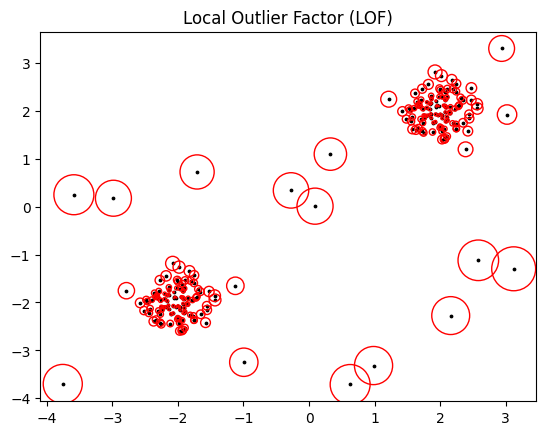

In [25]:
plt.title("Local Outlier Factor (LOF)")
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')
sc_points

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())


sc_circles = plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
sc_circles


plt.title es la funcion que ppone el título en el grafico que vamos a hacer
sc_points = plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Puntos de datos')= dibuja los puntos pequeños y de color negro guardados en la variable sc_points, misma que es la que muestra o dibuja los datos
radius, calcula elradio de los circulos en base a la puntuación obtenida en la variable x_scores
sc_circles= dibuja un criculo alrededro de cada punto de radio 1000* el valor almacenado en X_scores y lo dibuja en el grafico

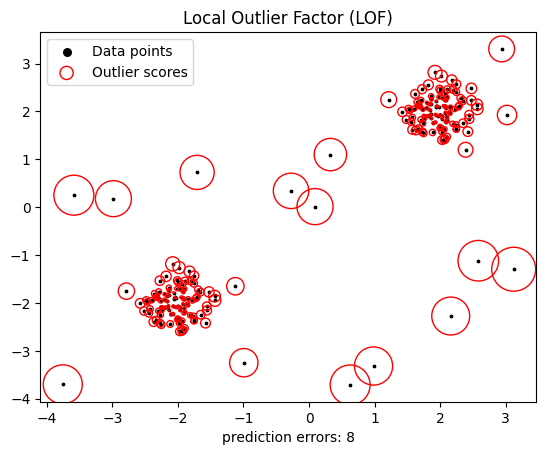

In [27]:
plt.title("Local Outlier Factor (LOF)")


sc_points = plt.scatter(
    X[:, 0], X[:, 1],
    color='k',
    s=3,
    label='Data points'
)


radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
sc_circles = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,
    edgecolors='red',
    facecolors='none',
    label='Outlier scores'
)


plt.autoscale()

plt.xlabel(f"prediction errors: {n_errors}")


leg = plt.legend(handles=[sc_points, sc_circles],
                 labels=['Data points', 'Outlier scores'],
                 loc='upper left')

leg.legend_handles[0].set_sizes([30])
leg.legend_handles[1].set_sizes([90])

plt.show()


een esta sección se dio formato al grafico añadiendo la leyenda y el cantidad de datos erroneos en la parte baja del grafico